# Importing the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Data collection and processing

In [2]:
df = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/Titanic survival prediction/train.csv')

In [3]:
#print the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#print the last 5 rows of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#shape of the dataset
df.shape

(891, 12)

In [6]:
#Getting some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking for any missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [8]:
# Cabin column contains less than 25% of the data so we are going to drop the column
df = df.drop(columns = 'Cabin', axis = 1)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
# Replacing the missing value in Age column with the mean of the age collumn
mean_val = df['Age'].mean()
df['Age'].fillna(mean_val, inplace = True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
#Replacing the missing value in Embarked column with the mode of the column
mode_val = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_val, inplace = True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data analysis and Visualization

In [14]:
#Getting some stastical measures about the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Checking for the no. of people who survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize = (7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<AxesSubplot:xlabel='Survived', ylabel='count'>

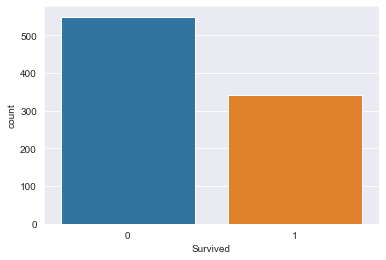

In [17]:
# Making a count plot for Survived column
sns.countplot(x = 'Survived', data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

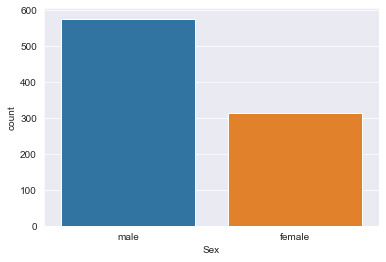

In [18]:
# Making a count plot for Gender column
sns.countplot(x = 'Sex', data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

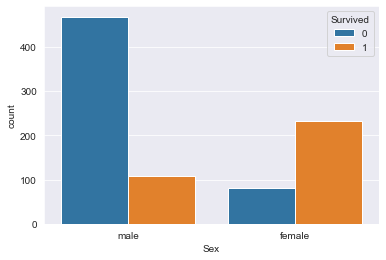

In [19]:
# No. of survivors based on their gender
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

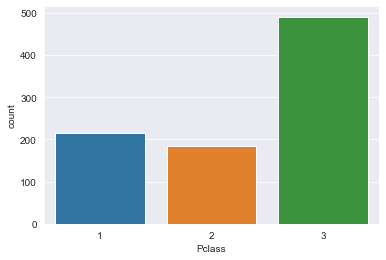

In [20]:
# Making a count plot for Pclass column
sns.countplot(x = 'Pclass', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

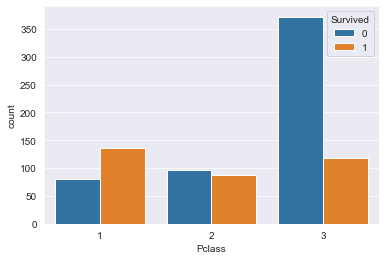

In [21]:
# No. of Pclass based on their gender
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

Encoding the categorical columns

In [22]:
objlist = df.select_dtypes('object').columns
objlist = list(objlist)
objlist.pop(0)
objlist.pop(1)
objlist

['Sex', 'Embarked']

In [23]:
encoder = LabelEncoder()

In [24]:
for col in objlist:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


Separating features and labels

In [26]:
X = df.drop(columns = ['PassengerId','Name', 'Ticket', 'Survived'], axis = 1)
Y = df['Survived']

# Splitting the data into training and testing data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, stratify = Y, random_state = 2)

In [28]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(712, 7) (179, 7)
(712,) (179,)


# Model training

Logistic regression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(x_train, y_train)

LogisticRegression()

Model evaluation:

accuracy score

In [31]:
#on training data
training_predict = model.predict(x_train)

training_accuracy = accuracy_score(y_train, training_predict)

print('TRAINING ACCURACY IS :', training_accuracy)

TRAINING ACCURACY IS : 0.8033707865168539


In [32]:
#on testing data
testing_predict = model.predict(x_test)

testing_accuracy = accuracy_score(y_test, testing_predict)

print('TESTING ACCURACY IS :', testing_accuracy)

TESTING ACCURACY IS : 0.7988826815642458
